In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from k12libs.utils.nb_easy import k12ai_start_html, k12ai_get_top_dir
import os
import PIL.Image as Image
import base64
import io
import json
import requests
from urllib.parse import urlencode

In [3]:
default_test_pic = os.path.join(k12ai_get_top_dir(), 'assets', 'test_face_det.jpg')

## 默认测试图片

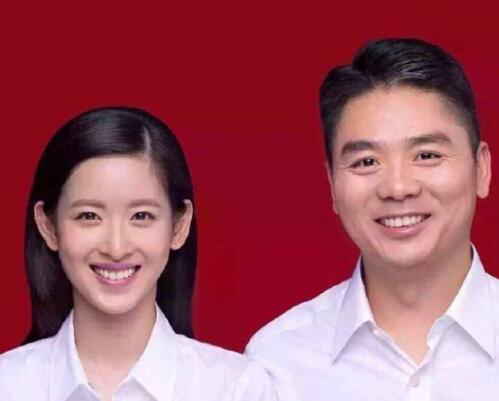

In [4]:
img = Image.open(default_test_pic)
img

## Base64

In [5]:
with open(default_test_pic, 'rb') as fr:
    b4data = base64.b64encode(fr.read()).decode()
    
params = {
    'default': b4data
}

## 脸部探测

### 方式一:API调用(/colorai/face_detection)

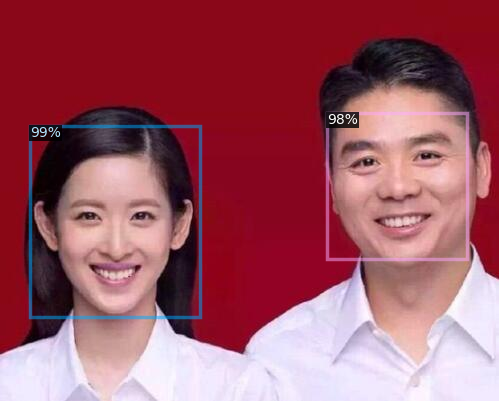

In [6]:
host = '116.85.54.39'
port = 8189

# API
uri = f'http://{host}:{port}/colorai/face_detection'

# 输入:
reqdata = {
    'orig_img': 'data:image/jpeg;base64,' + b4data
}

resdata = json.loads(requests.post(url=uri, json=reqdata).text)
# 输出:
# {
#     code: '100200' # ok
#     content: {'predict': 'data:image/png;base64,' + base64str}
# }

if '100200' == resdata['code']:
    result = resdata['content']
else:
    # error:
    print(resdata)
    raise
    
picbytes = base64.b64decode(result['predict'].split(',')[1])
Image.open(io.BytesIO(picbytes))

### 方式二:页面调试(点击后大概5秒出结果)

In [7]:
k12ai_start_html(f'predict.html?{urlencode(params)}', height=900, flask=True)

 * Serving Flask app "k12libs.utils.nb_easy" (lazy loading)


 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
